In [29]:
import pandas as pd
import numpy as np
import os
from io import StringIO
import re
import csv

from tabulate import tabulate



from sklearn.model_selection import train_test_split

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.decomposition import PCA

plt.rcParams['figure.figsize'] = [20, 10]

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 400)

os.getcwd()


'/Users/lubagloukhov/Documents/Consulting/PiqueSolutions/JavaSE_202007/scripts'

# Example
from https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

In [5]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [6]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


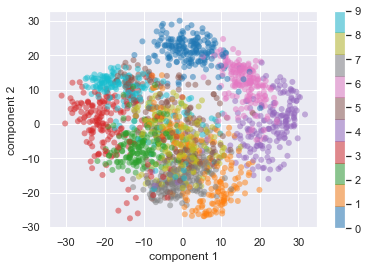

In [9]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('tab10', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

Text(0, 0.5, 'cumulative explained variance')

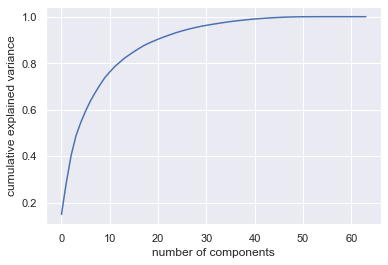

In [10]:
# choosing num comp
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

This curve quantifies how much of the total, 64-dimensional variance is contained within the first N components. For example, we see that with the digits the first 10 components contain approximately 75% of the variance, while you need around 50 components to describe close to 100% of the variance.

Here we see that our two-dimensional projection loses a lot of information (as measured by the explained variance) and that we'd need about 20 components to retain 90% of the variance. Looking at this plot for a high-dimensional dataset can help you understand the level of redundancy present in multiple observations.

# Load data

In [14]:
mod_df = pd.read_csv('../data/output/mod_df.csv')  
catg_dummy_list = open('../data/output/catg_dummy_list.csv').read().splitlines()
cont_dummy_list = open('../data/output/cont_dummy_list.csv').read().splitlines()
dummy0_dummy_list = open('../data/output/dummy0_dummy_list.csv').read().splitlines()
exlc_dummy_list = open('../data/output/exlc_dummy_list.csv').read().splitlines()

In [15]:

y0_list = ['Sat_Org_EclipseIDE',
 'Sat_Org_IntelliJIDE',
 'Sat_Org_JDeveloper',
 'Sat_Org_NetBeansIDE',
 'Sat_Org_RationalAppDev',
 'Sat_Org_VisualStudio',
 'Sat_Org_Other']
y1_list = ['Sat_Org_JavaSEAMC',
 'Sat_Org_JavaSEAMC_UsageLog',
 'Sat_Org_JavaSEDepRuleSet',
 'Sat_Org_JavaSEMSICustTools',
 'Sat_Org_JavaSEFlightRec']
y2_list = ['OJavaSESubscription_Elem_Sat_Org_ContinuedInvest',
 'OJavaSESubscription_Elem_Sat_Org_PatchesOlderV',
 'OJavaSESubscription_Elem_Sat_Org_JavaWebStartUpdates',
 'OJavaSESubscription_Elem_Sat_Org_DesktopManageUpdates',
 'OJavaSESubscription_Elem_Sat_Org_AutoUpdateTools',
 'OJavaSESubscription_Elem_Sat_Org_Monitoring',
 'OJavaSESubscription_Elem_Sat_Org_MyOSupport',
 'OJavaSESubscription_Elem_Sat_Org_AccessCloud',
 'OJavaSESubscription_Elem_Sat_Org_FlexLicensing',
 'OJavaSESubscription_Elem_Sat_Org_LegacyJava',
 'OJavaSESubscription_Elem_Sat_Org_Other']
y3_list = ['OJavaSESubscription_Attr_Sat_CommMethods',
 'OJavaSESubscription_Attr_Sat_PhoneSupport',
 'OJavaSESubscription_Attr_Sat_SSKnowledge',
 'OJavaSESubscription_Attr_Sat_CoNeedsUnd',
 'OJavaSESubscription_Attr_Sat_TrainingQual',
 'OJavaSESubscription_Attr_Sat_RepsonseTime']

In [16]:
x0_list = ['Use_Org_EclipseIDE',
 'Use_Org_IntelliJIDE',
 'Use_Org_JDeveloper',
 'Use_Org_NetBeansIDE',
 'Use_Org_RationalAppDev',
 'Use_Org_VisualStudio',
 'Use_Org_Other']

x1_list = ['Use_Org_JavaSEAMC',
 'Use_Org_JavaSEAMC_UsageLog',
 'Use_Org_JavaSEDepRuleSet',
 'Use_Org_JavaSEMSICustTools',
 'Use_Org_JavaSEFlightRec']
x2_list = ['OJavaSESubscription_Elem_Imp_Org_ContinuedInvest',
 'OJavaSESubscription_Elem_Imp_Org_PatchesOlderV',
 'OJavaSESubscription_Elem_Imp_Org_JavaWebStartUpdates',
 'OJavaSESubscription_Elem_Imp_Org_DesktopManageUpdates',
 'OJavaSESubscription_Elem_Imp_Org_AutoUpdateTools',
 'OJavaSESubscription_Elem_Imp_Org_Monitoring',
 'OJavaSESubscription_Elem_Imp_Org_MyOSupport',
 'OJavaSESubscription_Elem_Imp_Org_AccessCloud',
 'OJavaSESubscription_Elem_Imp_Org_FlexLicensing',
 'OJavaSESubscription_Elem_Imp_Org_LegacyJava',
 'OJavaSESubscription_Elem_Imp_Org_Other']
x3_list = ['OJavaSESubscription_Attr_Imp_CommMethods',
 'OJavaSESubscription_Attr_Imp_PhoneSupport',
 'OJavaSESubscription_Attr_Imp_SSKnowledge',
 'OJavaSESubscription_Attr_Imp_CoNeedsUnd',
 'OJavaSESubscription_Attr_Imp_TrainingQual',
 'OJavaSESubscription_Attr_Imp_RepsonseTime']

In [19]:
demog_vars = ['Country_Code_AU',
 'Country_Code_CA',
 'Country_Code_CZ',
 'Country_Code_DE',
 'Country_Code_DK',
 'Country_Code_GB',
 'Country_Code_IN',
 'Country_Code_IT',
 'Country_Code_NL',
 'Country_Code_QA',
 'Country_Code_US',
 'Country_Code_VN',
 'Company_Industry_2',
 'Company_Industry_5',
 'Company_Industry_6',
 'Company_Industry_7',
 'Company_Industry_8',
 'Company_Industry_9',
 'Company_Industry_10',
 'Company_Industry_11',
 'Company_Industry_12',
 'Company_Industry_14',
 'Company_Industry_15',
 'Company_Industry_16',
 'Company_Industry_17',
 'Company_Industry_18',
 'Company_Industry_19',
 'Company_Industry_20',
 'Company_Industry_21',
 'Company_Industry_22',
 'Company_Industry_23',
 'Company_Industry_25',
 'Job_Title_1',
 'Job_Title_2',
 'Job_Title_3',
 'Job_Title_4',
 'Job_Title_5',
 'Job_Title_8',
 'Company_Revenue_1',
 'Company_Revenue_2',
 'Company_Revenue_3',
 'Company_Revenue_4',
 'OracleJavaSESubscription_Org_Duration_1',
 'OracleJavaSESubscription_Org_Duration_2',
 'OracleJavaSESubscription_Org_Duration_3',
 'OracleJavaSESubscription_Org_Duration_4',
 'Java_App_Org_Deploy_2020_1',
 'Java_App_Org_Deploy_2020_2',
 'Java_App_Org_Deploy_2020_3',
 'Java_App_Org_Deploy_2020_4',
 'Java_App_Org_Deploy_2020_5',
 'OracleJavaSESubscription_Ind_Role_1',
 'OracleJavaSESubscription_Ind_Role_2',
 'OracleJavaSESubscription_Ind_Role_3',
 'OracleJavaSESubscription_Ind_Role_4',
 'OracleJavaSESubscription_Ind_Role_5',
 'OracleJavaSESubscription_Ind_Role_6',
 'Government_Org_Ind_Employee_1',
 'Government_Org_Ind_Employee_2',
 'App_Dev_Outsource_1',
 'App_Dev_Outsource_2',
 'Platform_Dev_Org_Primary_1',
 'Platform_Dev_Org_Primary_2',
 'Platform_Dev_Org_Primary_3',
 'Platform_Dev_Org_Primary_4',
 'Platform_Dev_Org_Primary_5',
 'Platform_Dev_Org_Primary_6',
 'Platform_Dev_Org_Primary_8',
 'JavaSESub_PrePurchasePeriod_1',
 'JavaSESub_PrePurchasePeriod_2',
 'JavaSESub_PrePurchasePeriod_3',
 'JavaSESub_PrePurchasePeriod_4',
 'JavaSESub_PrePurchasePeriod_5']

In [17]:
modw_df = mod_df.copy()
temp = mod_df[y0_list] * mod_df[x0_list].values
temp.columns = [x+"_w" for x in temp.columns]
modw_df = modw_df.join(temp)

temp = mod_df[y1_list] * mod_df[x1_list].values
temp.columns = [x+"_w" for x in temp.columns]
modw_df = modw_df.join(temp)

temp = mod_df[y2_list] * mod_df[x2_list].values
temp.columns = [x+"_w" for x in temp.columns]
modw_df = modw_df.join(temp)

temp = mod_df[y3_list] * mod_df[x3_list].values
temp.columns = [x+"_w" for x in temp.columns]
modw_df = modw_df.join(temp)

print(len(y3_list)+len(y2_list)+len(y1_list)+len(y0_list))
print(modw_df.shape)

29
(228, 264)


In [18]:
y0w_list = [x+"_w" for x in y0_list]
y1w_list = [x+"_w" for x in y1_list]
y2w_list = [x+"_w" for x in y2_list]
y3w_list = [x+"_w" for x in y3_list]

# PCA

In [30]:
# y2_mean 
# y2w_mean

y_list_list = [[y1w_list + y2w_list + y3w_list], 
              [y1w_list + y2w_list], 
              [y1w_list + y3w_list], 
              [y2w_list + y3w_list],
               y1w_list, 
               y2w_list,
               y3w_list]
y_list_names = ['y123w', 'y12w','y13w','y23w','y1w','y2w','y3w']

i=0

X_list = catg_dummy_list + cont_dummy_list + dummy0_dummy_list

X_drop = [[y1_list + y2_list + y3_list + x1_list + x2_list + x3_list ], 
          [y1_list + y2_list + x1_list + x2_list], 
          [y1_list + y3_list + x1_list + x3_list], 
          [y2_list + y3_list + x2_list + x3_list],
           y1_list + x1_list,  
           y2_list + x2_list,
           y3_list + x3_list]
    
    
y_funct = 'mean'
print(y_list_names[i])

# clf,MeanAbsoluteError, accuracy, y_na, varimp0, varimp1, varimp2, X_drop  = rf_pipe (
mod_df = modw_df#, 
y_list = y_list_list[i][0]#, # list of response variables, if len()>1, these will be summed or meaned
X_list = catg_dummy_list + cont_dummy_list + dummy0_dummy_list#, 
y_funct = y_funct#, # either None, 'sum' or 'mean'. Must be one of non-None if len(y_list)>1
X_drop = X_drop[i]#, # list of additional predictors to drop 
#               imp_filename = '../data/output/temp.csv')

X = modw_df.drop(y_list, axis=1, errors='ignore')
X = X[X_list]
X = X.drop(x1_list, axis=1, errors='ignore')
X = X.drop(y1_list, axis=1, errors='ignore')
X = X.drop(x2_list, axis=1, errors='ignore')
X = X.drop(y2_list, axis=1, errors='ignore')
X = X.drop(x3_list, axis=1, errors='ignore')
X = X.drop(y3_list, axis=1, errors='ignore')

if y_funct == 'sum':
    y = mod_df[y_list].sum(axis=1,skipna=True)
elif y_funct == 'mean':
    y = mod_df[y_list].mean(axis=1,skipna=True)
else:
    y = mod_df[y_list]

X = X.fillna(X.mean())
y = y.fillna(y.mean())


X_train, X_test,y_train, y_test = train_test_split(X,y, random_state=0)


y123w


In [31]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(X_train)
print(X_train.shape)
print(projected.shape)

(171, 138)
(171, 2)


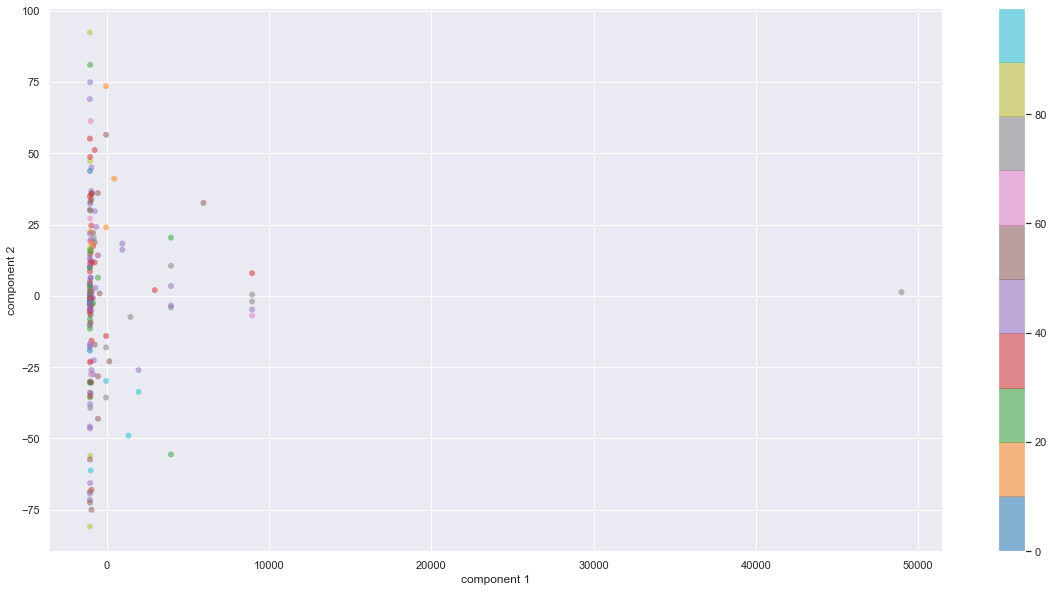

In [33]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=y_train, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('tab10', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

Text(0, 0.5, 'cumulative explained variance')

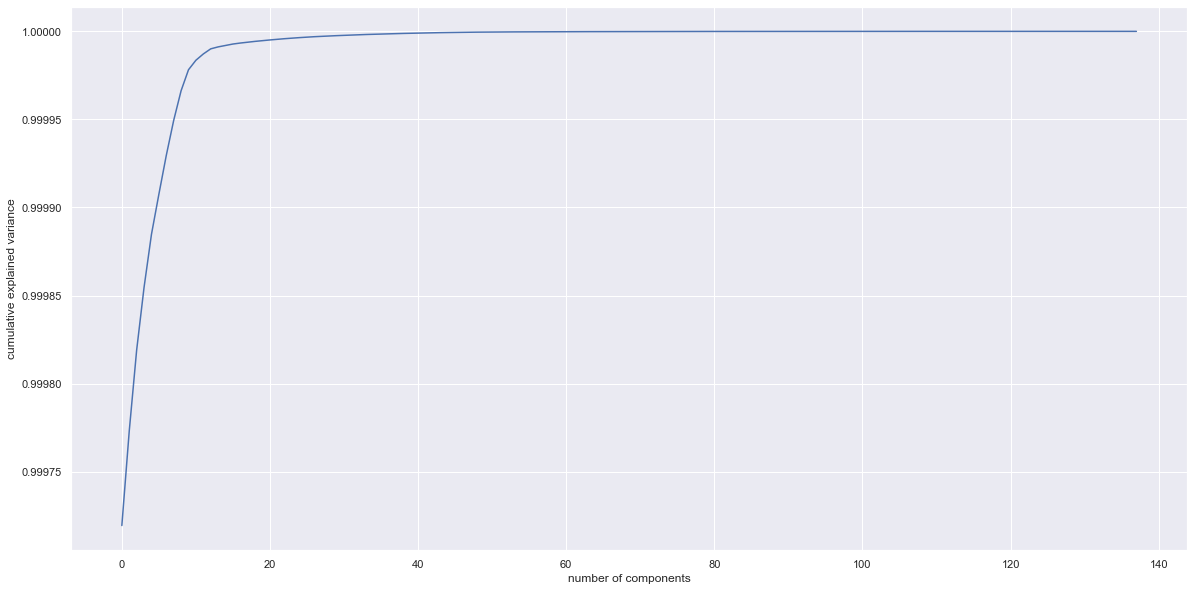

In [34]:
# choosing num comp
pca = PCA().fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [38]:
pd.DataFrame(pca.components_.T, index=X_train.columns)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137
Country_Code_AU,-2.712217e-07,-1.663935e-04,-4.530333e-05,-4.026258e-05,-2.245440e-04,1.277120e-04,1.091757e-04,2.104047e-04,2.253005e-04,-2.046331e-04,-3.309363e-04,4.732040e-04,-5.020254e-05,-8.919421e-04,3.981350e-04,-1.769384e-03,-1.228633e-03,3.118190e-03,-1.567091e-04,2.625500e-03,1.964971e-03,-3.078149e-04,-2.887043e-03,-1.128013e-03,-2.424660e-03,-1.701325e-03,1.160626e-03,7.424383e-04,-2.377991e-03,1.282344e-03,-1.420449e-03,-8.609317e-04,2.438543e-03,-4.598909e-03,-1.804495e-04,2.797092e-03,3.745251e-03,-5.071383e-03,3.164486e-03,-5.007488e-04,3.630366e-03,-1.179610e-04,-2.120725e-03,-8.894960e-03,-3.661640e-03,-1.998709e-03,4.689845e-03,8.288302e-03,7.093937e-03,-3.962398e-03,-1.713509e-03,-1.022273e-02,6.181819e-04,-7.821168e-03,-1.767479e-02,-1.193332e-02,2.495358e-02,9.467075e-03,7.329405e-03,8.377778e-03,5.489782e-04,1.911270e-02,1.712065e-02,-9.034468e-03,-1.706416e-03,-4.396190e-03,-9.936312e-03,1.381629e-02,-6.666702e-03,-1.611347e-02,-2.252879e-02,5.710933e-03,-1.588743e-02,6.579015e-03,-9.367144e-03,-4.562434e-03,3.940427e-02,-1.509418e-02,4.337856e-03,7.280076e-03,2.049437e-02,-1.398234e-02,1.412764e-02,-6.762843e-03,-2.711312e-02,2.613220e-02,-6.516800e-04,-3.684490e-02,-2.592157e-02,3.327419e-03,-1.344779e-02,-1.026893e-02,7.943169e-03,4.425131e-03,1.608611e-02,3.408455e-02,-6.285191e-02,2.519577e-02,8.493703e-02,3.773871e-02,-5.774264e-02,9.243677e-03,-1.750591e-01,6.086583e-02,-7.371155e-02,-2.012049e-01,7.647303e-02,4.921100e-01,-8.444082e-02,3.574666e-01,-1.660594e-01,-8.637439e-02,-1.432555e-01,5.651454e-02,1.670415e-01,-2.160212e-01,-1.286570e-01,-2.594837e-02,4.638459e-01,-1.422778e-01,-8.567159e-02,7.666674e-02,-1.133715e-01,-7.140902e-02,3.015113e-01,-0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00
Country_Code_CA,-8.916219e-06,-1.822950e-03,2.046670e-03,1.852669e-04,2.163166e-03,-2.008590e-03,6.022177e-04,-5.720212e-04,1.446599e-03,6.190872e-03,-2.244268e-03,-7.663008e-03,8.898910e-03,-9.393794e-03,-7.574178e-03,-5.408758e-03,-1.135066e-02,3.919552e-03,9.778151e-03,-6.988840e-03,-3.578718e-03,2.333376e-02,1.629747e-02,-2.002159e-02,1.104113e-02,3.041436e-03,2.109247e-03,-7.421823e-03,-1.012094e-02,7.049041e-03,3.070831e-02,2.867541e-02,1.736977e-02,2.126114e-02,-1.055539e-02,1.633426e-02,5.053375e-03,3.792892e-02,2.197710e-02,-3.896090e-02,-2.535399e-02,1.424313e-03,3.448457e-03,-4.508822e-02,4.189472e-03,9.468192e-02,-6.122415e-03,4.495280e-02,-3.167955e-02,3.290530e-02,4.394469e-02,5.949720e-02,-1.044908e-01,8.704475e-02,-7.397995e-02,-2.580976e-01,8.695204e-02,1.760097e-01,1.106864e-02,9.419918e-02,-3.619575e-02,-4.803351e-02,-4.646348e-02,5.977260e-02,1.247407e-01,-3.256341e-02,1.433554e-01,-1.446797e-01,9.012094e-02,-1.403128e-01,3.895945e-03,-1.197778e-01,-7.704738e-02,7.673400e-03,1.331839e-01,-1.735688e-01,3.316062e-03,2.620892e-01,1.029995e-01,1.497680e-02,-5.974943e-02,5.420942e-02,-2.100128e-02,2.890703e-02,1.580618e-01,1.027472e-01,-4.671204e-02,7.008343e-02,2.918732e-01,-1.431247e-01,3.046538e-01,-2.385354e-01,-5.120720e-02,1.517752e-02,1.309705e-01,-7.354807e-02,1.066699e-01,-1.414883e-01,-5.699668e-02,-1.902128e-01,-1.506695e-01,1.052101e-01,8.625681e-02,-5.630634e-02,-4.512452e-03,3.663869e-02,-1.235193e-02,-9.739914e-02,-4.305830e-02,-2.407005e-02,1.093890e-01,5.199591e-02,-5.140390e-02,2.193289e-03,-3.330553e-02,-7.305956e-02,1.172519e-02,9.814582e-02,5.031261e-02,-3.555589e-02,1.651226e-02,-2.149400e-02,-9.888167e-0

In [39]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
''' Step 2: regression on selected principal components'''

# Define the PCA object
pca = PCA()
# Preprocess (2) Standardize features by removing the mean and scaling to unit variance
X_train_std = StandardScaler().fit_transform(X_train)
# Run PCA producing the reduced variable Xred and select the first pc components
X_train_reg = pca.fit_transform(X_train_std)[:,:2]


# Create linear regression object
regr = linear_model.LinearRegression()
# Fit
regr.fit(X, y)
# Calibration
y_c = regr.predict(X)
# Cross-validation
y_cv = cross_val_predict(regr, X, y, cv=10)
# Calculate scores for calibration and cross-validation
score_c = r2_score(y, y_c)
score_cv = r2_score(y, y_cv)
# Calculate mean square error for calibration and cross validation
mse_c = mean_squared_error(y, y_c)
mse_cv = mean_squared_error(y, y_cv)


In [46]:
X_train_reg.shape

(171, 2)

In [51]:
len(regr.coef_)

138

In [44]:
regr.coef_

array([-8.73935420e+09, -8.73935421e+09, -8.73935423e+09, -8.73935421e+09,
       -8.73935422e+09, -8.73935421e+09, -8.73935421e+09, -8.73935422e+09,
       -8.73935421e+09, -8.73935419e+09, -8.73935421e+09, -8.73935416e+09,
       -1.20085598e+01,  1.74975718e+01, -1.61126542e+00,  3.11496973e-01,
        8.22249079e+00, -4.46683788e+00,  3.53299892e+01, -1.22333474e+01,
        1.64319022e+01,  4.69137001e+00, -7.38192987e+00,  7.09893227e-01,
       -5.17229652e+00,  1.69568963e+01,  4.21767235e-02, -5.62986851e-01,
        6.93547726e-01, -8.70733404e+00, -3.40359573e+01, -1.46706333e+01,
       -5.74057961e+00,  4.01418817e+00, -1.41154724e+00,  9.78795242e+00,
       -5.48672318e+00, -1.16107428e+00,  1.79557776e+00, -2.11753869e+00,
        7.87601709e-01, -4.65768814e-01, -1.73828647e+00,  2.25100017e+00,
        5.96429348e+00, -6.47714433e+00, -7.13868916e-01, -3.04924583e+00,
       -2.80097765e+00,  1.08526003e+00,  5.47907352e+00, -7.04079956e-01,
        2.02782917e+00, -

In [49]:
coefficients = pd.concat([pd.Series(["PC1","PC2"]),
                          pd.DataFrame(np.transpose(regr.coef_))], axis = 1)

In [50]:
coefficients

,0,0
0,PC1,-8.739354e+09
1,PC2,-8.739354e+09
2,NaN,-8.739354e+09
3,NaN,-8.739354e+09
4,NaN,-8.739354e+09
5,NaN,-8.739354e+09
6,NaN,-8.739354e+09
7,NaN,-8.739354e+09
8,NaN,-8.739354e+09
9,NaN,-8.739354e+09
